c:\Users\ldwen\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.8730 - loss: 0.4165
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9830 - loss: 0.0541
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9878 - loss: 0.0398
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.9910 - loss: 0.0296
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.9935 - loss: 0.0209
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9862 - loss: 0.0406
Test accuracy: 0.989300012588501
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


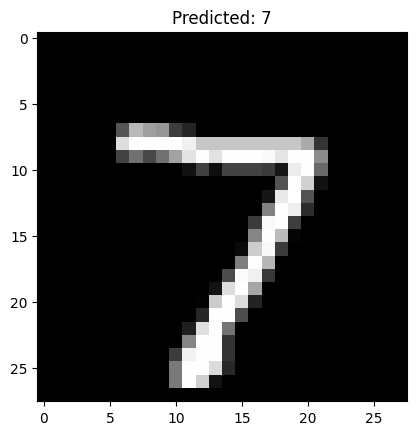

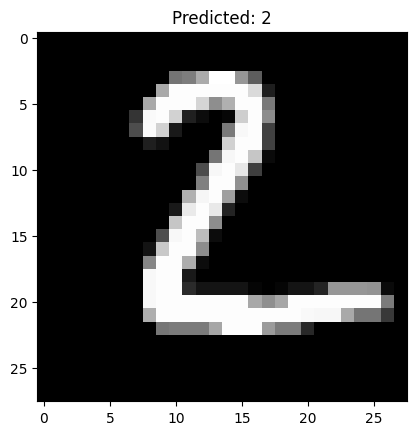

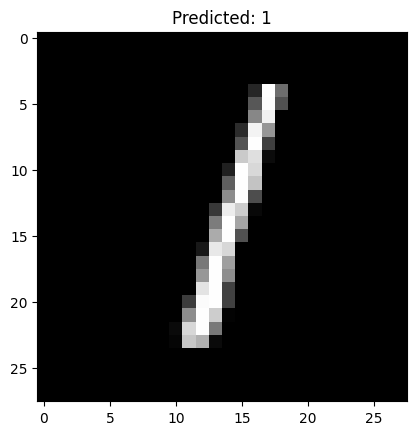

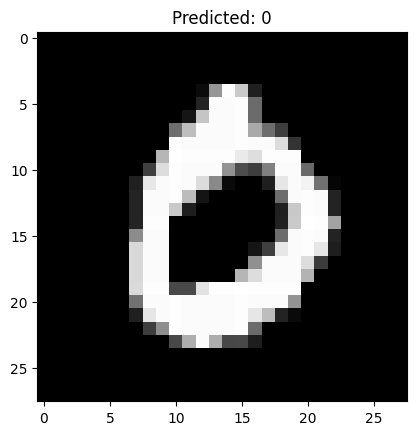

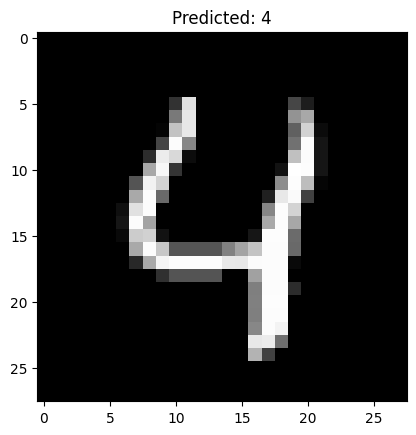

In [1]:
# Import required libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# Load and prepare the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

# Reshape and normalize the data
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

train_images, test_images = train_images / 255.0, test_images / 255.0

# Build a simple CNN model
model = models.Sequential()

# Add a Convolutional Layer with 32 filters of size 3x3 and ReLU activation
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))

# Add a MaxPooling layer to reduce the size
model.add(layers.MaxPooling2D((2, 2)))

# Add another Convolutional layer
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Add another MaxPooling layer
model.add(layers.MaxPooling2D((2, 2)))

# Add a Flatten layer to convert the 2D feature maps into a 1D vector
model.add(layers.Flatten())

# Add a fully connected (Dense) layer with 64 units
model.add(layers.Dense(64, activation='relu'))

# Add an output layer with 10 units (for the 10 classes of digits) and softmax activation
model.add(layers.Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the CNN model
model.fit(train_images, train_labels, epochs=5, batch_size=64)

# Evaluate the model on test data
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc}")

# Plot example predictions
predictions = model.predict(test_images[:5])

for i in range(5):
    plt.imshow(test_images[i].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {predictions[i].argmax()}")
    plt.show()


This is a basic CNN structure for image classification.

1.   Modify it by adding more layers and adjusting the parameters (e.g., filters, learning rate)
2.   Use different dataset



c:\Users\ldwen\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 18s 19ms/step - accuracy: 0.2965 - loss: 1.8867 - val_accuracy: 0.5220 - val_loss: 1.3420
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 15s 19ms/step - accuracy: 0.5335 - loss: 1.2990 - val_accuracy: 0.5879 - val_loss: 1.1498
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 18s 22ms/step - accuracy: 0.6003 - loss: 1.1244 - val_accuracy: 0.6311 - val_loss: 1.0318
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - accuracy: 0.6414 - loss: 1.0077 - val_accuracy: 0.6610 - val_loss: 0.9479
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - accuracy: 0.6662 - loss: 0.9429 - val_accuracy: 0.6702 - val_loss: 0.9208
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 19s 25ms/step - accuracy: 0.6933 - loss: 0.8667 - val_accuracy: 0.6986 - val_loss: 0.8650
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 31s 38ms/step - accuracy: 0.7070 - loss: 0.8277 - val_accuracy: 0.7084 - val_loss: 0.8242
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 23s 30ms/step - accuracy: 0.7303 - loss: 0.7714 - 

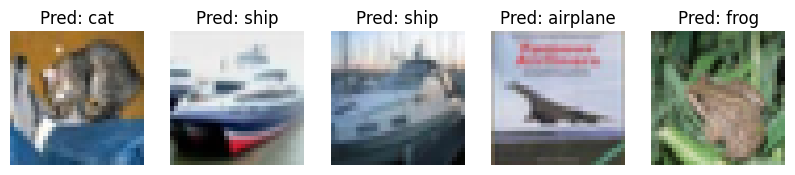

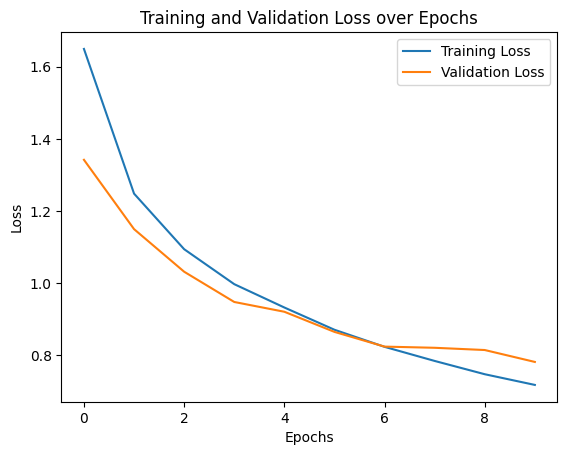

In [6]:
# Import required libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.layers import Dropout
import matplotlib.pyplot as plt

# Load and prepare the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize the pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Define the class names for CIFAR-10 dataset
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Build the CNN model
model = models.Sequential()

# Add the first convolutional layer
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), padding='same'))

# Add a max pooling layer
model.add(layers.MaxPooling2D((2, 2), padding='same'))

# Add a second convolutional layer
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))

# Add another max pooling layer
model.add(layers.AveragePooling2D((2, 2),padding='same'))

# Add a third convolutional layer
model.add(layers.Conv2D(64, (3, 3), activation='relu',padding='same'))
model.add(Dropout(.4))

# Flatten the output to feed it into a dense (fully connected) layer
model.add(layers.Flatten())

# Add a fully connected layer with 64 units
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='relu'))

# Add the output layer with 10 units (one for each class) and softmax activation
model.add(layers.Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_data=(test_images, test_labels))

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc}")

# Plot sample images and their predictions
predictions = model.predict(test_images[:5])

plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.title(f"Pred: {class_names[predictions[i].argmax()]}")
    plt.axis('off')
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [7]:
model.save('cnnmodel.keras')

This basic CNN is giving decent results on CIFAR-10!

1.   Modify the model by adding more layers, different hyperparameters
2.   Use different architectures


